# Diabetes Machine Learning Project

# 糖尿病确诊风险诊断 机器学习项目

Introduction:
    
This project aims at building a machine learning model for predicting whether a patient contracted diabetes base on 17 predictors, which are all health indexes provided by the patient. The data used is from the dataset "Diabetes Dataset 2019" uploaded on Kaggle. In the project, I'll adopt multiple machine learning models with different complexity for classification problems, and deploy the model with best performance as a web application.

The online web application can be found at the end of this report.

The dataset can be found in this page:

https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019

简介：该项目为设计一款可以快速，有效基于病人17项健康指标，推断病人确诊糖尿病风险的app设计。使用的数据集为Kaggle平台公开数据集“Diabetes Dataset 2019”。该项目使用包括逻辑回归，K近邻，决策树，随机森林的多种机器学习模型，取得可以最大化预测糖尿病风险的模型并通过Heroku平台部署为web应用程序。

本项目报告使用Python虚拟开发环境Jupyter Notebook完成，数据分析，可视化由Python第三方包Numpy，Pandas，Seaborn进行，机器学习模型训练使用Python第三方包Sklearn完成。

已经部署完成的web应用程序可以在报告结尾访问。

原数据集链接：

https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019


# Content table:

Importing needed packages for Python

Data description

Data cleaning

Dummy variable creation

Exploratory data analysis

Machine learning model training:

    Train-Test split (With interpretation)
    
    Logistic regression (With interpretation)
    
    KNN model (With interpretation)
    
    Decision Tree model:
        
        Single Tree
        
        Bagging (Random Forest)
       
        Boosting (Adaptive Boosting)
    
Conclusion on model performance

Evaluation on testing data

Remark

The web application: Diabetes contracting risk predictor


# 目录：

导入Python第三方包

数据初步探索

数据清理

创建虚拟变量

EDA（数据探索性分析）

机器学习模型训练：

    训练集/测试集分割
   
    逻辑回归
   
    K近邻模型
   
    决策树模型：
   
        单一决策树
        
        装袋算法（随机森林）
        
        增强模型 （自适应增强）
  
模型性能评估

最终测试

总结

web应用程序：糖尿病确诊推断系统 （需要改代理访问）   

# Importing needed packages for Python

# 导入Python第三方包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
diabetes = pd.read_csv('diabetes_dataset__2019.csv')

In [4]:
diabetes.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [6]:
diabetes.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


# Data description

# 数据初步探索

This dataset includes 17 attributes and the object of prediction: diabetic. Among all 17 predictors, four of them are quantitative: BMI, Sleep, SoundSleep and Pregnancies. The rest 13 are all qualitative, a closer look toward the data for potential problems is provided below.

Detailed description of each predictor is below:

Age: numerical, the age of patient

Gender: categorical, two levels, the sex of patient

Family_Diabetes: categorical, two levels, whether the patient's family has history of contracting diabetes

HighBP: categorical, two levels, whether the patient has high blood pressure

PhysicallyActive: categorical, four levels, amount of time the patient spends on physical exercises every day

BMI: numerical, the body BMI index of the patient

Smoking: categorical, two levels, whether the patient smokes or not

Alcoho: categotical, two levels, whether the patient drinks alcohol or not

Sleep: numerical, amount of time the patient sleeps everyday on average (in hours)

SoundSleep: numerical, amount of time the patient has SoundSleep every day on average (in hours)

RegularMedicine: categorical, two levels, whether the patient uses medicine regularly in daily life

Junkfood: categorical, four levels, how frequently the patient eats junkfood

Stress: categorical, four levels, how frequently the patient feels stressed

BPlevel: categorical, three levels, low, normal or high

Pregnancies: numerical, number of pregnancies the patient has

Pdiabetes: categorical, two levels, whether the patient had gastational diabetes during pregnancy

UriationFreq: categorical, two levels, whether the patient has high frequency of uriation

Diabetic: categorical, two levels, whether the patient contracted Diabetes

本数据集包括17个变量，其中四个为定量变量，剩余13个为定性变量。

变量描述：

年龄：定量变量

性别：定性变量，2 level

家庭糖尿病史：定性变量，2 level

高血压：定性变量，2 level

每日运动时间：定性变量，4 level

BMI：定量变量

是否吸烟：定性变量，2 level

是否饮酒：定性变量，2 level

日均睡眠时间：定量变量

日均深度睡眠时间：定量变量

是否日常用药：定性变量，2 level

垃圾食物摄取频率：定性变量，4 level

日常焦虑频率：定性变量，4 level

血压：定性变量，3 level（与变量“高血压”冲突）

怀孕次数：定量变量

孕期糖尿病史：定性变量，2 level

泌尿频率：定性变量，2 level

是否确诊糖尿病：定性变量，2 level

# DATA CLEANING

# 数据清洗

Firstly we try to figure out whether there are any null values in the dataset

<AxesSubplot: >

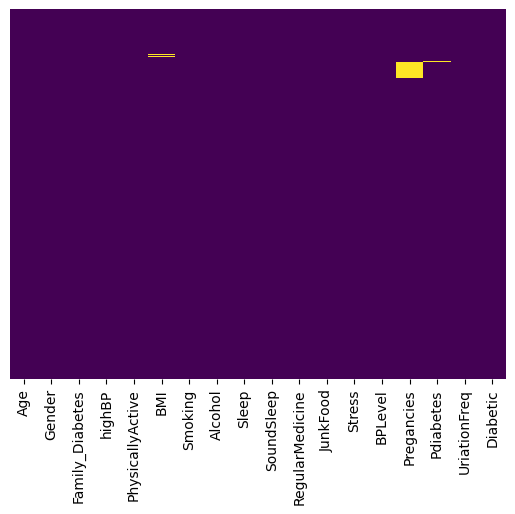

In [7]:
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

We can see most null values are aggregated in the column 'Pregnancies'

To fill in those missing values, we stratify the whole dataset into four groups base on the age range, for a female observation with missing pregnancy value, we fill in the mean pregnancy value of the age group which this observation is in, for a male observation we simply fill in 0.

变量“怀孕次数”存在大量空值，针对此现象，将患者分为男女两组，男性组统一以0作为“怀孕次数”数值，针对女性组继续细分为四个不同年龄段的小组，每个小组中“怀孕次数”为null的病人，取该年龄组中怀孕次数平均值四舍五入后作为该病人的“怀孕次数”。

<AxesSubplot: xlabel='Age', ylabel='Pregancies'>

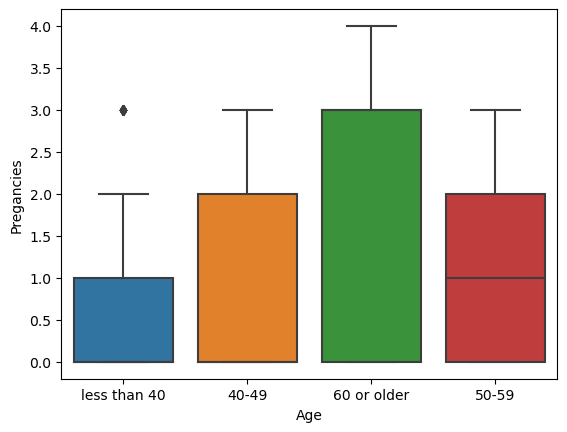

In [8]:
# want to find avg num of pregnancies for diff age groups
sns.boxplot(data = diabetes[diabetes['Gender'] == 'Female'], x='Age', y='Pregancies')

In [9]:
diabetes_fm = diabetes[diabetes['Gender'] == 'Female']
diabetes_fm_40 = diabetes_fm[diabetes_fm['Age'] == 'less than 40']
diabetes_fm_50 = diabetes_fm[diabetes_fm['Age'] == '40-49']
diabetes_fm_60 = diabetes_fm[diabetes_fm['Age'] == '50-59']
diabetes_fm_over60 = diabetes_fm[diabetes_fm['Age'] == '60 or older']
print(f'mean number of pregnancies for ages less than 40 is', np.mean(diabetes_fm_40['Pregancies']))
print(f'mean number of pregnacnices for ages 40-49 is', np.mean(diabetes_fm_50['Pregancies']))
print(f'mean number of pregnancies for ages 50-59 is', np.mean(diabetes_fm_60['Pregancies']))
print(f'mean number of pregnancies for ages 60 or older is', np.mean(diabetes_fm_over60['Pregancies']))
# round off number of pregnancies to nearest whole number
preg_40 = round(np.mean(diabetes_fm_40['Pregancies']))
preg_50 = round(np.mean(diabetes_fm_50['Pregancies']))
preg_60 = round(np.mean(diabetes_fm_60['Pregancies']))
preg_over60 = round(np.mean(diabetes_fm_over60['Pregancies']))

mean number of pregnancies for ages less than 40 is 0.5748502994011976
mean number of pregnacnices for ages 40-49 is 1.1176470588235294
mean number of pregnancies for ages 50-59 is 1.0
mean number of pregnancies for ages 60 or older is 2.0392156862745097


In [10]:
def impute_pregnancy(df):
    Age_group = df[0]
    Gender = df[1]
    num_of_pregnancies = df[2]
    
    if pd.isnull(num_of_pregnancies):
        if Gender == 'Male':
            return 0.0
        elif Age_group == 'less than 40':
            return preg_40
        elif Age_group == '40-49':
            return preg_50
        elif Age_group == '50-59':
            return preg_60
        elif Age_group == '60 or older':
            return preg_over60
    else:
        return num_of_pregnancies

In [11]:
diabetes['Pregancies'] = diabetes[['Age','Gender','Pregancies']].apply(impute_pregnancy,axis=1)

<AxesSubplot: >

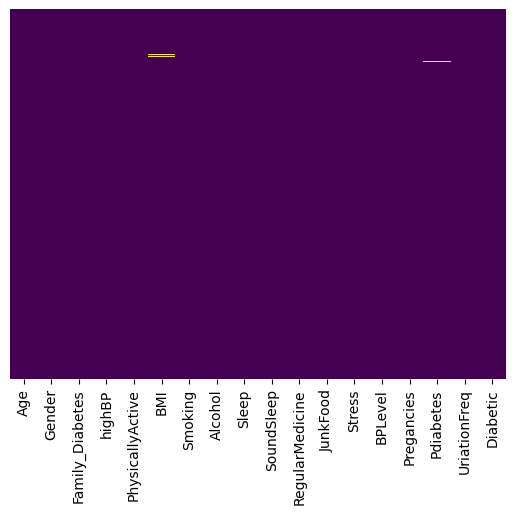

In [12]:
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we successfully removed missing values in the column pregnancy

This step is identical to step_impute_linear(age, impute_with = inp_vars(age_group))

# Dummy variable creation

# 创建虚拟变量

we want to replace categorical data into numeric counterparts so we can do data analysis

针对所有定性变量创造虚拟变量

In [13]:
diabetes['Gender'].replace(to_replace = ['Male', 'Female'], value = [0, 1], inplace = True)

def binary_converter(cols):
    Family_Diabetes = cols
    
    if Family_Diabetes == 'no':
        return 0
    elif Family_Diabetes == 'yes':
        return 1
def binary_converter2(cols):
    UriationFreq = cols
    
    if UriationFreq  == 'not much':
        return 0
    elif UriationFreq  == 'quite often':
        return 1

In [14]:
diabetes['Family_Diabetes'] = diabetes['Family_Diabetes'].apply(binary_converter)
diabetes['Smoking'] = diabetes['Smoking'].apply(binary_converter)
diabetes['Alcohol'] = diabetes['Alcohol'].apply(binary_converter)
diabetes['RegularMedicine'] = diabetes['RegularMedicine'].apply(binary_converter)
diabetes['Diabetic'] = diabetes['Diabetic'].apply(binary_converter)
diabetes['UriationFreq'] = diabetes['UriationFreq'].apply(binary_converter2)

In [15]:
diabetes.head(10)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,0,yes,one hr or more,39.0,0,0,8,6,0.0,occasionally,sometimes,high,0.0,0,0,0.0
1,50-59,0,0,yes,less than half an hr,28.0,0,0,8,6,1.0,very often,sometimes,normal,0.0,0,0,0.0
2,40-49,0,0,no,one hr or more,24.0,0,0,6,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
3,50-59,0,0,no,one hr or more,23.0,0,0,8,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
4,40-49,0,0,no,less than half an hr,27.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
5,40-49,0,0,yes,none,21.0,0,1,10,10,0.0,occasionally,sometimes,high,0.0,0,0,1.0
6,less than 40,0,0,no,one hr or more,24.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
7,less than 40,0,0,no,less than half an hr,20.0,0,0,7,7,1.0,occasionally,sometimes,low,0.0,0,0,0.0
8,40-49,0,1,no,one hr or more,23.0,0,0,7,7,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
9,less than 40,0,0,no,more than half an hr,20.0,0,0,8,8,NaN,occasionally,sometimes,normal,0.0,0,0,0.0


By this step we converted all values of six columns above into 0 and 1, 0 implying no and 1 implying yes

将所有取值为no/yes的变量转化为取值为0(no)/1(yes)的变量

In [16]:
# highBP column largely extraneous given BPlevel column... drop from dataset
# 变量“高血压”与变量“血压”冲突，删除
diabetes.drop(['highBP'], axis = 1, inplace=True)

Also, there are some columns with not unified categorical values, for example, "low" and "Low", we need to unify them by the following lower-upper converter

部分变量存在取值混乱问题：如变量“血压”取值为low，normal，high，但是实际数据集中却存在“low”和“Low”两种不同的表达方式，因此需要进行统一化，同时，“normal”也被表达为“normal”和“normal ”

In [16]:
diabetes['BPLevel'].nunique()
diabetes['BPLevel'].value_counts()

normal     707
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64

In [17]:
# it looks like not all of our textual data is in the format we want... write a function to homogenize BPLevel
def lowerupper(col):
    if col == 'Low':
        return 'low'
    elif col == 'High':
        return 'high'
    elif col == 'normal ':
        return 'normal'
    else:
        return col
    
def lowerupper2(col):
    if col == 'no ':
        return 'no'
    elif col == ' no':
        return 'no'
    else:
        return col

In [18]:
diabetes['BPLevel'] = diabetes['BPLevel'].apply(lowerupper)
diabetes['Diabetic'] = diabetes['Diabetic'].apply(lowerupper2)

In [19]:
diabetes['JunkFood'].nunique()

4

In [20]:
diabetes['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [21]:
diabetes['Stress'].nunique()

4

In [22]:
diabetes['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [23]:
diabetes['PhysicallyActive'].nunique()

4

In [24]:
diabetes['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

In [25]:
diabetes['Age'].nunique()

4

In [26]:
diabetes['Age'].value_counts()

less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64

In [27]:
BP_level = pd.get_dummies(diabetes['BPLevel'], drop_first = True)
diabetes.drop(['BPLevel'], axis=1, inplace = True)
diabetes = pd.concat([diabetes, BP_level], axis = 1)

Stress = pd.get_dummies(diabetes['Stress'], drop_first = True)
diabetes.drop(['Stress'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, Stress], axis = 1)

JunkFood = pd.get_dummies(diabetes['JunkFood'], drop_first = True)
diabetes.drop(['JunkFood'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, JunkFood], axis = 1)

PhysicallyActive = pd.get_dummies(diabetes['PhysicallyActive'], drop_first = True)
diabetes.drop(['PhysicallyActive'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, PhysicallyActive], axis = 1)

Age = pd.get_dummies(diabetes['Age'], drop_first = True)
diabetes.drop(['Age'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, Age], axis = 1)

In [28]:
pd.set_option('display.max_columns', None)
diabetes.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


Now the dummy variables for those categorical variables with more than two levels are also created and merged into the dataset.

In [29]:
diabetes['Pdiabetes'].nunique()
diabetes['Pdiabetes'].value_counts()
type(diabetes['Pdiabetes'][0])

str

In [30]:
def pdiabetes_converter(pdiabetes):
    if pdiabetes == 'yes':
        return 1
    elif pdiabetes == 'no':
        return 0
    else:
        return 0

In [31]:
diabetes['Pdiabetes'] = diabetes['Pdiabetes'].apply(pdiabetes_converter)

In [32]:
diabetes[diabetes['Gender']==0]['Pdiabetes'].value_counts()

0    579
1      1
Name: Pdiabetes, dtype: int64

数据集中存在一个怀孕次数不为0的男性病人，鉴定为异常数据，剔除

There is one wierd observatioin: a male patient with number of pregnancy not equal to zero, for this observation we simply delete it.

In [33]:
diabetes.drop(diabetes[(diabetes['Gender']==0) & (diabetes['Pdiabetes']==1)].index,inplace=True)

In [34]:
diabetes.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


All columns have been successfully converted to numerical form for our ML algorithms! Now let's change the names of our columns to make it clear what they represent.

In [35]:
diabetes.rename(columns = {'low':'low BP', 'normal':'normal BP',
                              'not at all':'no stress', 'sometimes':'occasional stress',
                          'very often':'high stress', 'occasionally':'healthy diet', 'often': 'unhealthy diet',
                          'very often': 'very unhealthy diet', 'more than half an hr': '0.5+ hr exercise',
                          'none': '0 hr exercise', 'one hr or more':'1+ hr exercise','Pregancies':'pregnancies'}, inplace = True)

As we see here we had 2 columns titled 'very often', one corresponding to the column 'very often' for stress, the corresponding to the column 'very often' for Junkfood, but both columns were assigned the same label!

In [36]:
diabetes2 = diabetes['very unhealthy diet']
diabetes.drop('very unhealthy diet', axis = 1, inplace = True)
diabetes2.columns = ['high stress', 'very unhealthy diet']
diabetes2
diabetes = pd.concat([diabetes, diabetes2], axis = 1)

At last, we remove any observation that still has missing values

In [37]:
diabetes.dropna(inplace = True)
diabetes.describe()
diabetes.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,pregnancies,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


This is the dataset we finished processing

至此，数据集已经完成清洗，可以进行机器学习模型训练

In [38]:
diabetes.shape

(945, 26)

To be honest all these steps correspond to one line in the R recipe: step_dummy(all_nominal_predictors())
    
But the data is pretty dirty though, tons of work needs to be down for unifying outcome values of each categorical variable.

# Exploratory Data Analysis

# 探索性数据分析

Let's explore the relationship between different variables in our datset

In [39]:
eda_dataset = pd.read_csv('diabetes_dataset__2019.csv')
eda_dataset['Diabetic'] = eda_dataset['Diabetic'].apply(binary_converter)
eda_dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,0.0


Now we see how many different values do each catagorical column has 

In [40]:
eda_dataset['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [41]:
eda_dataset['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [42]:
eda_dataset['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

Recall that the 'BPLevel' column has some entries followed by a space behind them

Use the cleaning function before

In [43]:
eda_dataset['BPLevel'] = eda_dataset['BPLevel'].apply(lowerupper)

In [44]:
eda_dataset['BPLevel'].value_counts()

normal    708
high      216
low        28
Name: BPLevel, dtype: int64

In [45]:
eda_dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,0.0


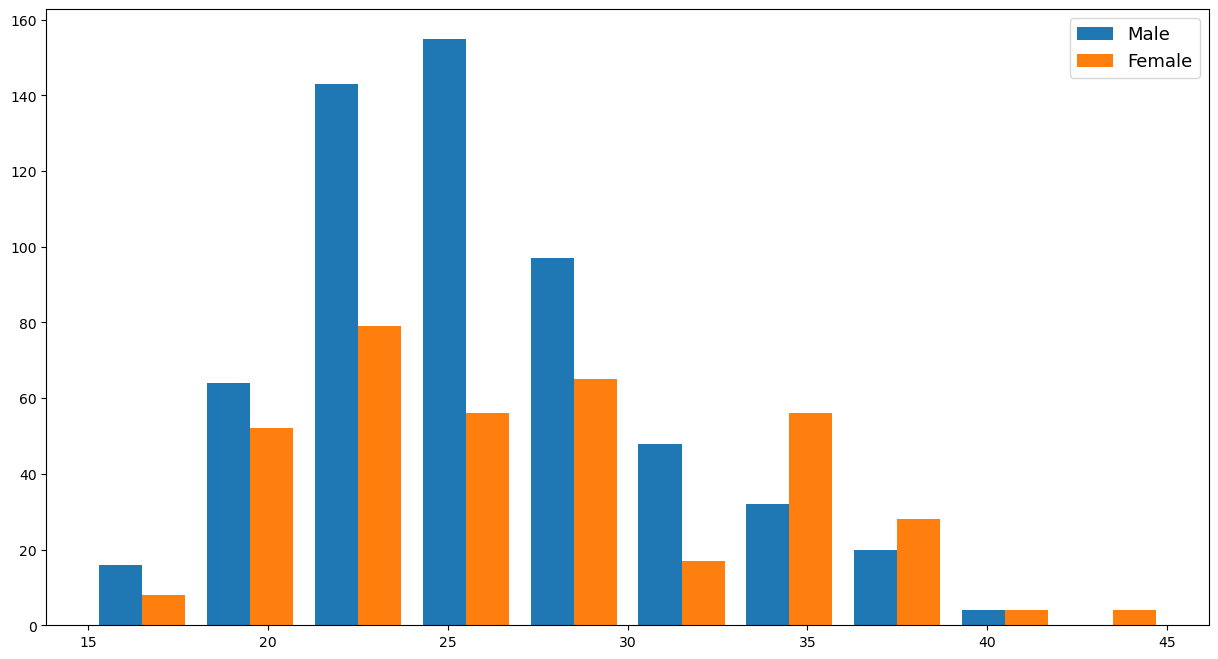

In [46]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Gender']=='Male']['BMI']
y = eda_dataset[eda_dataset['Gender']=='Female']['BMI']
plt.hist([x, y],label=['Male','Female'])
plt.legend(fontsize=13)
plt.show()

From this graph, female patients tend to have higher BMI than male patients

通过该表，可以明显看出数据集中女性观测的BMI高于男性观测的BMI

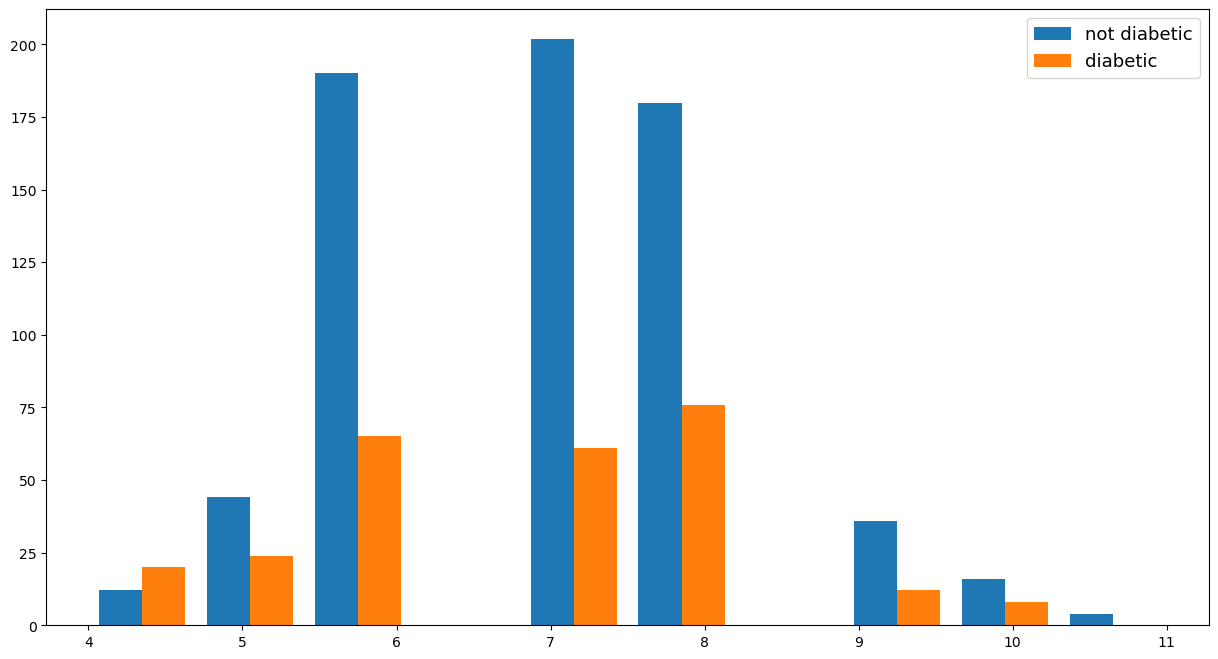

In [47]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Diabetic']==0.0]['Sleep']
y = eda_dataset[eda_dataset['Diabetic']==1.0]['Sleep']
plt.hist([x, y],label=['not diabetic','diabetic'])
plt.legend(fontsize=13)
plt.show()

No evident trend between time of sleep and contracting diabetes, amount of sleep follows a Gaussian distribution

通过该表，反映出糖尿病确诊与睡眠时间没有明显的联系

<AxesSubplot: xlabel='Sleep', ylabel='Smoking'>

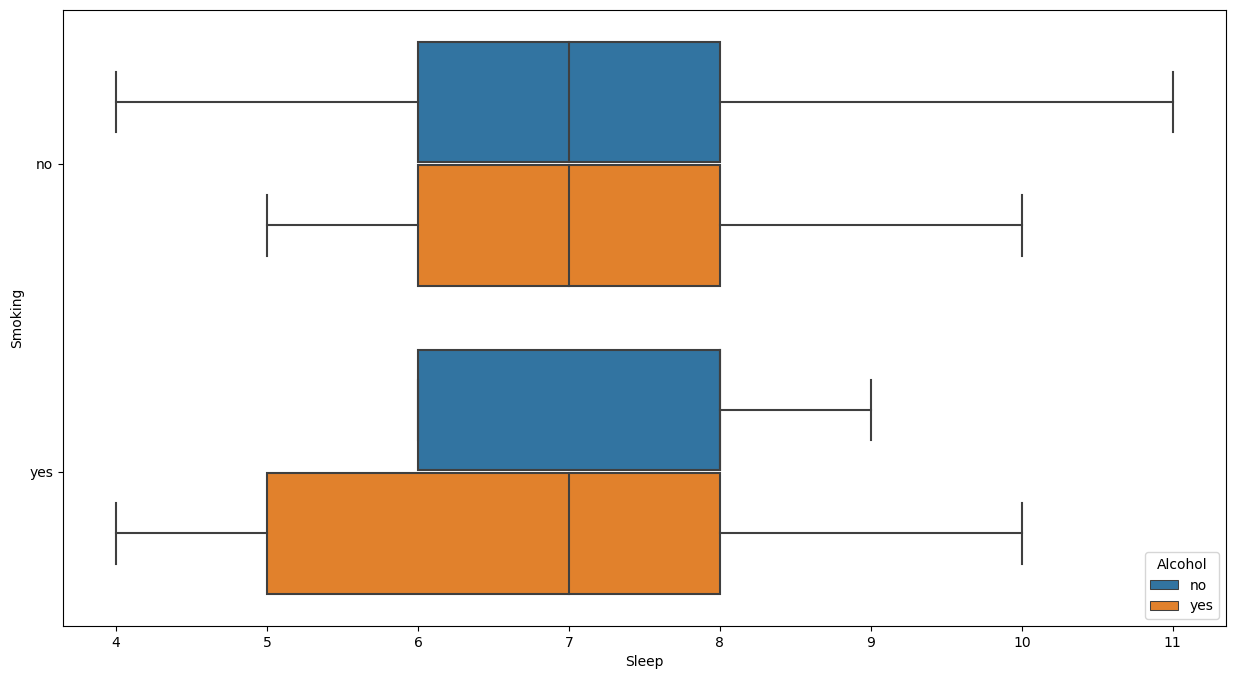

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(data = eda_dataset, x='Sleep', y='Smoking', hue = "Alcohol")

For amount of sleeping per day, smoking and alcohol are not evident indicators, although for those who don't smoke, the sleeping time tends to be more densly packed for the group which drinks alcohol. But for those who smoke, the sleeping time is more densly packed for the group that doesn't drink alcohol.

将数据集分为吸烟与不吸烟两组，所有不吸烟的测试参与者中，不饮酒者的睡眠时间波动相比饮酒者更大，所有吸烟的测试参与这种，饮酒者的睡眠时间相比不饮酒者波动更大

<AxesSubplot: xlabel='Sleep', ylabel='JunkFood'>

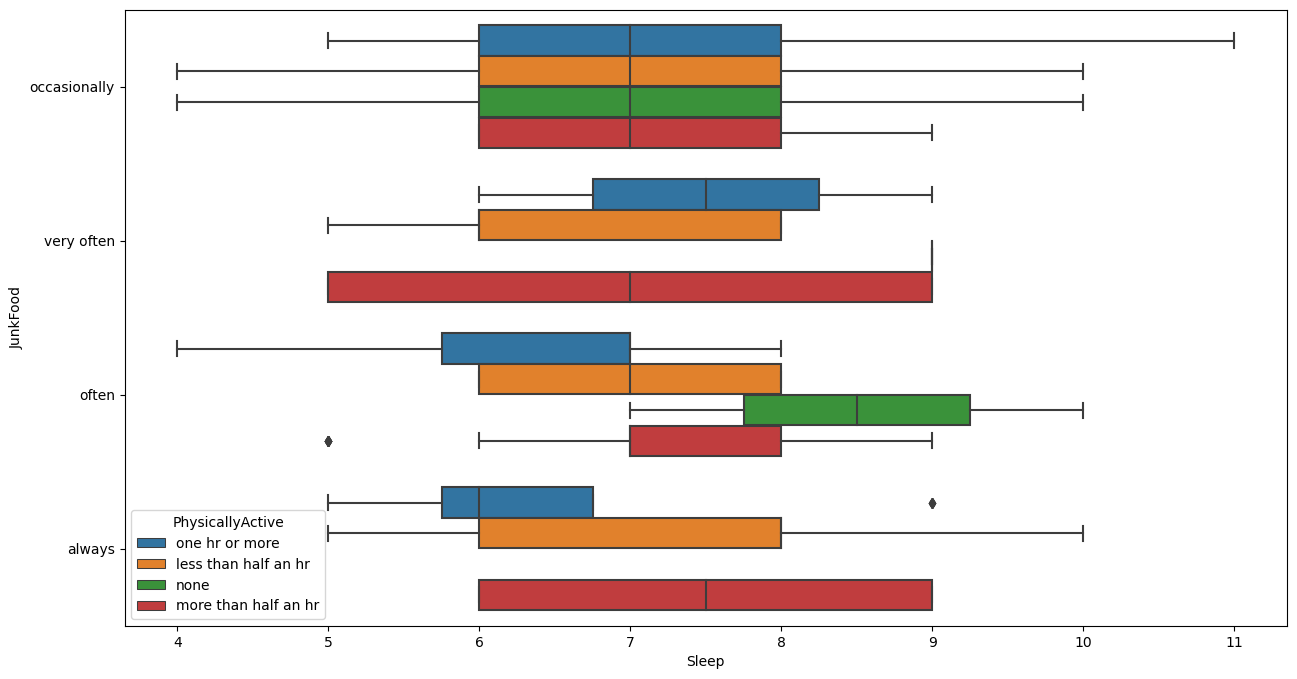

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(data = eda_dataset, x='Sleep', y='JunkFood', hue = "PhysicallyActive")
# For patients with different frequency of eating Junkfood, their sleeping time also follow different trends. For those who only have junkfood 

For patients with different frequency of eating Junkfood, their sleeping time also follow different trends. 

For those who only have junkfood occationally, no matter how much time they spend of physical exercises, the mean value of sleeping time is the same, but those who exercise more tend to have more sleep from the whisker. 

For those who often eat Junkfood, people who exercise more tend to sleep less.

For those who always eat Junkfood, people who exercise 0.5 to 1 hour per day sleep more than people who exercise less then 0.5 hour per day, however, people who exercise more than 1 hour per day sleep less than the two previous groups.

将数据根据不同的垃圾食品摄入频率，日平均运动量进行分组，各组的睡眠时间波动也不相同

<AxesSubplot: xlabel='BPLevel', ylabel='count'>

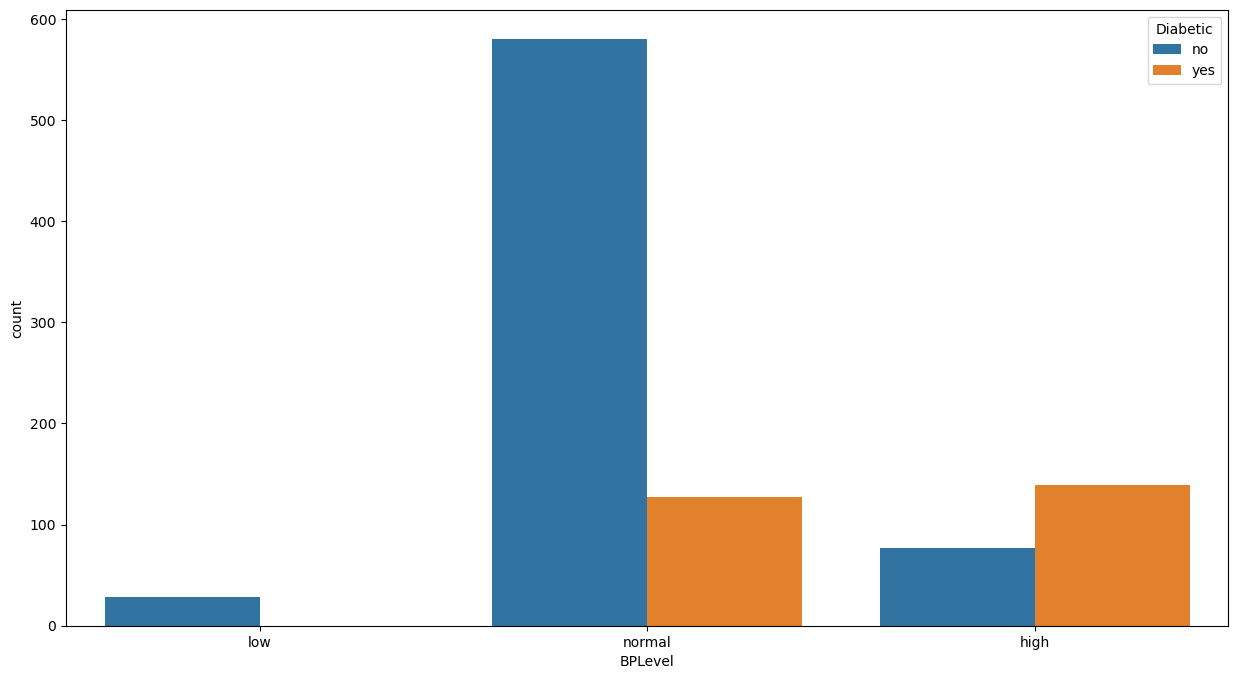

In [50]:
diabetes2 = pd.read_csv('diabetes_dataset__2019.csv')
diabetes2['BPLevel'] = diabetes2['BPLevel'].apply(lowerupper)
diabetes2['Diabetic'] = diabetes2['Diabetic'].apply(lowerupper2)
plt.figure(figsize=(15,8))
sns.countplot(x='BPLevel', data=diabetes2, hue='Diabetic',order=['low','normal','high'])
# People with higher bloodpressure tend to be more prone in contracting diabetes

People with higher bloodpressure tend to be more prone in contracting diabetes.

Summarizing the outcome of DEA together, we see some trends between multiple predictors, however, given most predictors are categorical, not much information about correlaciton cen be yielded.

Firstly, female patients generally have higher BMI than male patients.

Secondly, time of sleep is not a significant factor affecting the risk of contracting Diabetes. 

For different populations with different life style and diets, their sleeping time varies as well.

Lastly, higher blood pressure level leads to higher risk of contracting diabetes.

From the EDA part we found some interesting but not necessarily, inspiring trends, here, we start to actually train machine learning models that help us effectively predict the risk of contracting diabetes for new patients.

# MACHINE LEARNING MODEL TRAINING

# 机器学习模型训练

# Train-test split

# 训练集/测试集 分割

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA

We rearrage our dataset to cluster catagorical data together and numerical data together

In [53]:
diabetes3 = diabetes[['BMI','Sleep','SoundSleep','pregnancies']]
diabetes.drop(['BMI','Sleep','SoundSleep','pregnancies'], axis=1, inplace=True)

In [54]:
diabetes = pd.concat([diabetes,diabetes3],axis = 1)
diabetes.head()

,Gender,Family_Diabetes,Smoking,Alcohol,RegularMedicine,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet,BMI,Sleep,SoundSleep,pregnancies
0,0,0,0,0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,39.0,8,6,0.0
1,0,0,0,0,1.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,28.0,8,6,0.0
2,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,24.0,6,6,0.0
3,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,23.0,8,6,0.0
4,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,27.0,8,8,0.0


In [258]:
X = diabetes.drop('Diabetic', axis=1)
y = diabetes['Diabetic']

Here we set seed = 3 to ensure the replicability of the outcome

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

This is our initial split of training and testing data, we stratify the split with respect to y so that the training data and testing data both have approximately the same portion of diabetic and non-diabetic patients.

进行 训练集/测试集分割时，根据变量“确诊糖尿病与否”进行分割，保证训练集与测试集中糖尿病患者占比相似

In [261]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3, stratify = y_train)

This is our split for training and validation data

在已有的训练集中进行一次 训练集/验证集 分割，使用验证集对模型准确度进行预测

In [262]:
print(y_train.value_counts())
print(y_vali.value_counts())
print(y_test.value_counts())

0.0    356
1.0    139
Name: Diabetic, dtype: int64
0.0    120
1.0     46
Name: Diabetic, dtype: int64
0.0    204
1.0     80
Name: Diabetic, dtype: int64


It looks like our data is imbalanced... we will use SMOTE algorithm to oversample positive test cases

训练集中，糖尿病患者与非糖尿病患者比例悬殊，因此需要使用smote复制糖尿病患者数据，平衡比例

In [61]:
def smote_data(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(0,22)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote
X_train_smote, y_train_smote = smote_data(X_train, y_train)

This step is identical to "step_upsample(diabetic, over_ratio = 1)" in R.

Notice that we defined a pair of new sets: X_train_smote and Y_train_smote, therefore we have a new balanced training set while the initial imbalanced training set is preserved.

we don't want to run SMOTE algorithm on testing data, as doing so will alter the actual data and hus result in an inaccurate view of model performance

In [62]:
print(y_train_smote.value_counts())

0.0    353
1.0    353
Name: Diabetic, dtype: int64


# LOGISTIC REGRESSION

# 逻辑回归

The first model we play with is the classic Logistic Regression, at first we fit the model with the imbalanced training set

In [187]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [188]:
pred = logmodel.predict(X_vali)

Now we use the precision and recall to evaluate the performance of our model.

In [189]:
print(classification_report(y_vali,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       116
         1.0       0.84      0.76      0.80        50

    accuracy                           0.89       166
   macro avg       0.87      0.85      0.86       166
weighted avg       0.88      0.89      0.88       166



In [192]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred)

In [193]:
metrics.auc(fpr, tpr)

0.8498275862068966

This is the ROC-AUC value of the model

这是该模型的概率曲线面积（ROC-AUC）数值

Now we fit the model again with the balanced training set

In [198]:
logmodel2 = LogisticRegression(solver='liblinear')
logmodel2.fit(X_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [199]:
pred1 = logmodel2.predict(X_vali)

In [200]:
print(classification_report(y_vali,pred1))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       116
         1.0       0.80      0.78      0.79        50

    accuracy                           0.87       166
   macro avg       0.85      0.85      0.85       166
weighted avg       0.87      0.87      0.87       166



In [201]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred1)
metrics.auc(fpr, tpr)

0.8468965517241379

This is the AUC-ROC value of the model

该数值为模型对应的AUC-ROC数值

# INTERPRETING OUR DATA

# 模型表现评估

For balanced training data

Among all patients not contracting diabetes, 91% of those are correctly identifited by our model 

Among all patients contracting diabetes, 80% of those are correctly idenfitied by our model 

91% of those who did not contract diabetes were correctly identified (Among all those who are identified as not contracing diabetes)

78% of those who did contract diabetes were correctly identified Among all those who are identified as contracing diabetes)

The model has AUC_ROC area 0.8468965517241379 using balanced training data.

针对平衡过的训练集，使用验证集进行测试

91%的非糖尿病患者被成功分类为非糖尿病患者

80%的糖尿病患者被成功识别

所有被模型分类为非糖尿病患者的病人中，91%确实为非糖尿病患者

所有被模型分类为糖尿病患者的病人中，78%确实为糖尿病患者

模型的AUC-ROC数值为0.8468

For imbalanced training data

Among all patients not contracting diabetes, 90% of those are correctly identifited by our model 

Among all patients contracting diabetes, 84% of those are correctly idenfitied by our model 

94% of those who did not contract diabetes were correctly identified (Among all those who are identified as not contracing diabetes)

76% of those who did contract diabetes were correctly identified (Among all those who are identified as contracing diabetes)

The model has AUC_ROC area 0.8498275862068966 using imbalanced training data.

针对平衡过的训练集，使用验证集进行测试

90%的非糖尿病患者被成功分类为非糖尿病患者

84%的糖尿病患者被成功识别

所有被模型分类为非糖尿病患者的病人中，94%确实为非糖尿病患者

所有被模型分类为糖尿病患者的病人中，76%确实为糖尿病患者

模型的AUC-ROC数值为0.8498

Both models have approximately the same performance

Our model is overall strong, but could perhaps have improved performance in predicting positive cases for predicting diabetes. Here we will privliege higher RECALL over PRECISION, since we want to make sure that, among all patients identified as contracting diabetes, more of them actually do.

The next step we can do is using gridsearch to identify best parameters for the model, that is, tuning parameters

模型总体精度可以接受，但是本项目的目的在于提高针对糖尿病群体进行预测的准确度。

使用平衡训练集与否对模型表现影响不明显，接下来，将使用穷举调参对模型精确度进行优化。

In [208]:
grid = {
    'C': [1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10],
    'penalty': ['l1', 'l2']
        }

Here, we introduce two parameters, C and penalty, the parameter C , "inverse of regulation strength", is a float number representing "how much we shall trust the training data", to be more straightforward, it is the inverse of $\lambda$ we have in Ridge and Lasso regressions. The parameter penalty represents what kind of regularized regression we are performing: l1 for ridge and l2 for lasso.

Here we have 20 combinations of hyperparameters, $\lambda$ ranges from 1 to 10, with two different penalties.

针对逻辑回归的穷举调参包括两个参数：惩罚项设置与$\lambda$值设置，惩罚项采用l1时，逻辑回归模型使用脊回归，采用l2时，逻辑回归模型采用Lasso回归，C对应的为回归模型中$\lambda$的倒数，C越小，模型对各变量斜率的限制就越大

In [209]:
gs = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)

In [210]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=LogisticRegression(random_state=3, solver='liblinear'),
             param_grid={'C': [1, 0.5, 0.3333333333333333, 0.25, 0.2,
                               0.16666666666666666, 0.14285714285714285, 0.125,
                               0.1111111111111111, 0.1],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [211]:
# check best parameters / estimator
gs.best_params_

{'C': 1, 'penalty': 'l1'}

In [212]:
gs.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=3, solver='liblinear')

In [213]:
gs_predictions = gs.predict(X_vali)

In [214]:
print(classification_report(y_vali, gs_predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       116
         1.0       0.84      0.76      0.80        50

    accuracy                           0.89       166
   macro avg       0.87      0.85      0.86       166
weighted avg       0.88      0.89      0.88       166



In [215]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, gs_predictions)
metrics.auc(fpr, tpr)

0.8498275862068966

Well, fairly speaking there isn't much improvement with the imbalance training data.
We try again with the balanced training data.

In [216]:
gs = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)
gs.fit(X_train_smote, y_train_smote)
gs.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.14285714285714285, 'penalty': 'l1'}

In [217]:
gs_predictions = gs.predict(X_vali)
print(classification_report(y_vali, gs_predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       116
         1.0       0.76      0.84      0.80        50

    accuracy                           0.87       166
   macro avg       0.85      0.86      0.85       166
weighted avg       0.88      0.87      0.88       166



In [218]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, gs_predictions)
metrics.auc(fpr, tpr)

0.8639655172413793

Interesting, this time the recall for diabetic patients rises from 0.76 to 0.84, with AUC-ROC area 0.8639655172413793, we take it as a good sign.

This is all we can do with logistic and regularized regression, now we are going to try out some other machine learning models.

通过穷举调参后，选用最佳的一组模型参数，λ取7，惩罚项取l1，模型的AUC-ROC数值提升到了0.8640

# KNN model

# K近邻回归模型

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [221]:
knn.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

In [222]:
pred2 = knn.predict(X_vali)

In [223]:
print(classification_report(y_vali, pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       116
         1.0       0.64      0.72      0.68        50

    accuracy                           0.80       166
   macro avg       0.76      0.77      0.76       166
weighted avg       0.80      0.80      0.80       166



In [224]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred2)
metrics.auc(fpr, tpr)

0.7737931034482759

Oops, looks like the performance of our KNN model on predicting the validation set is not as good as logistic regression model. But we can try to tune the number of neighbors to improve its accuracy.

We try out number of neighbors from 1 to 40.

针对K近邻模型，我们对近邻数量进行调参，通过测试k=1到k=40的所有近邻数量中，最小化错误率的近邻数量

In [225]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_vali)
    error_rate.append(np.mean(pred_i != y_vali))

Text(0, 0.5, 'Error Rate')

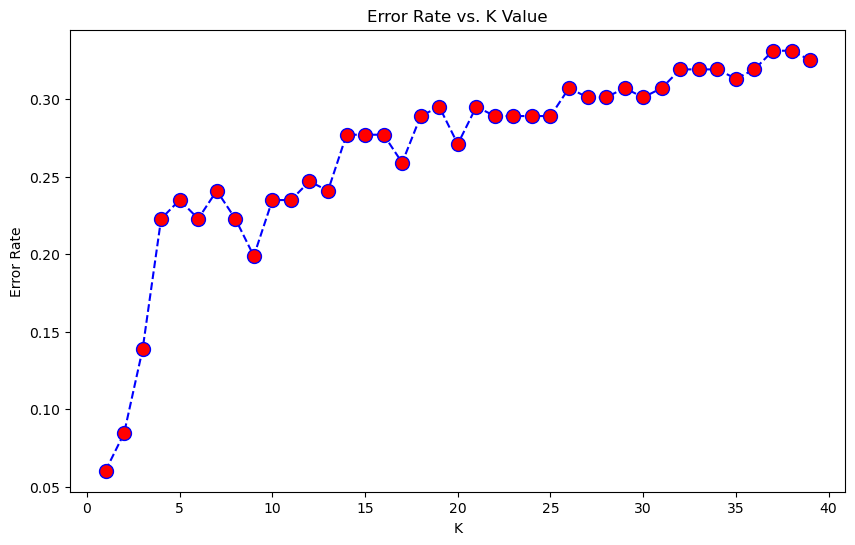

In [226]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Well, it turns out that for such a small dataset, using k = 1 is a good option.

当采用k=1为近邻数量时，模型的误差得到最小化

In [227]:
knn2 = KNeighborsClassifier(n_neighbors = 1)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=1)

In [228]:
pred2 = knn2.predict(X_vali)

In [229]:
print(classification_report(y_vali, pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       116
         1.0       0.90      0.90      0.90        50

    accuracy                           0.94       166
   macro avg       0.93      0.93      0.93       166
weighted avg       0.94      0.94      0.94       166



In [230]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred2)
metrics.auc(fpr, tpr)

0.9284482758620689

This time the outcome of the model is awesome when we set number of neighbors to be one!

Among all patients not contracting diabetes, 96% of those are correctly identifited by our model 

Among all patients contracting diabetes, 90% of those are correctly idenfitied by our model 

96% of those who did not contract diabetes were correctly identified (Among all those who are identified as not contracing diabetes)

90% of those who did contract diabetes were correctly identified (Among all those who are identified as contracing diabetes)

The corresponding AUC-ROC area reached 0.9284482758620689, exceeding 0.9!

相比于逻辑回归模型，K近邻的模型表现明显更加优秀。

96%的非糖尿病患者被正确地分类为非糖尿病患者

90%的糖尿病患者被成功识别

所有被模型分类为非糖尿病患者的病人中，96%确实为非糖尿病患者

所有被模型分类为糖尿病患者的病人中，96%确实为糖尿病患者

模型的AUC-ROC数值为0.9284，跨越了0.9这个关键阈值

# Decision tree Model

# 决策树模型

In [231]:
dtree = DecisionTreeClassifier()

In [232]:
dtree.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [233]:
pred3 = dtree.predict(X_vali)

In [234]:
print(classification_report(y_vali, pred3))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       116
         1.0       0.98      0.86      0.91        50

    accuracy                           0.95       166
   macro avg       0.96      0.93      0.94       166
weighted avg       0.95      0.95      0.95       166



In [235]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred3)
metrics.auc(fpr, tpr)

0.9256896551724139

Wow, the decision tree classification model has amazing performance!

Among all patients not contracting diabetes, 94% of those are correctly identifited by our model 

Among all patients contracting diabetes, 98% of those are correctly idenfitied by our model 

99% of those who did not contract diabetes were correctly identified (Among all those who are identified as not contracing diabetes)

86% of those who did contract diabetes were correctly identified (Among all those who are identified as contracing diabetes)

The corresponding AUC-ROC area is 0.9256896551724139.

决策树模型的表现不逊于，甚至略超过K近邻模型的表现

94%的非糖尿病患者被正确地分类为非糖尿病患者

98%的糖尿病患者被成功识别

所有被模型分类为非糖尿病患者的病人中，99%确实为非糖尿病患者

所有被模型分类为糖尿病患者的病人中，86%确实为糖尿病患者

Now we try to tune parameters for the decision tree model.

现在我们针对决策树进行调参，目的为提高糖尿病患者群体的召回率（recall）

In [236]:
grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2,3,4]
        }

The parameter "max_depth" is the number of layers the decision tree is allowed to have at most. The parameter "min_samples_split" is the minimun number of samples that the decision tree must have at each leaf。

决策树模型的参数为“决策树深度”与“分割所需最小样品数”，“决策树深度”为该决策树模型的层数，也就是在对一个案例进行分类之前，案例在决策树上最大可能经过的“叶片”数量，“分割所需最小样品数”为该决策树每一处“叶片”需要的，满足该叶片条件的最小样本数。

In [237]:
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 3), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)
gs.fit(X_train_smote, y_train_smote)
gs.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'max_depth': 5, 'min_samples_split': 2}

In [238]:
gs_predictions = gs.predict(X_vali)
print(classification_report(y_vali, gs_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       116
         1.0       0.86      0.86      0.86        50

    accuracy                           0.92       166
   macro avg       0.90      0.90      0.90       166
weighted avg       0.92      0.92      0.92       166



In [239]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, gs_predictions)
metrics.auc(fpr, tpr)

0.8998275862068965

Well, looks like the decision tree with default parameter has better performance, since this time the AUC-ROC area value decreased below 0.9.

经过调参之后的决策树模型，表现反而有所下降。

Let's try 'bagging' the decision trees through the random forest classifier to see if we can further optimize performance, like, elevating the recall of diabetic patients above 0.9.

The measure for 'bagging' the decision tress is using random forest model.

现在，我们尝试通过装袋算法（bagging），通过大量决策树模型形成随机森林模型进行评估。

# Random Forest Model

# 随机森林模型

We start with a random forest model with 100 decision trees.

从100个决策树模型形成的随机森林模型开始

In [240]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [241]:
pred4 = rfc.predict(X_vali)

In [242]:
print(classification_report(y_vali, pred4))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       116
         1.0       0.96      0.90      0.93        50

    accuracy                           0.96       166
   macro avg       0.96      0.94      0.95       166
weighted avg       0.96      0.96      0.96       166



In [244]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred4)
metrics.auc(fpr, tpr)

0.9413793103448275

Fantastic! Now we have recall for diabetic patients 0.9, while the other three outcomes remaining the same! The AUC-ROC area value is approaching 0.95 as well.

Now we proceed to tune parameters for the random forest model.

随即森林模型的表现出乎意料，在保留了针对非糖尿病群体的精准率（precision）与召回率（recall）和糖尿病群体的精准率同时，使非糖尿病群体的召回率达到了90%，模型总体的Auc-Roc数值为0.9414.

In [245]:
grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2,3,4]
        }

In addition to the two parameters of Decision Tree we tuned before, we add the parameter "n_estimators", the number of trees in the forest, as our new parameter to tune.

随即森林模型的参数为决策树模型的基础上，增加“决策树数量”。

In [246]:
gs3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, scoring = 'recall',
                 refit = True, verbose = 1)

In [247]:
gs3.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [248]:
gs3.best_params_

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}

In [249]:
gs3_predictions = gs3.predict(X_vali)

In [250]:
print(classification_report(y_vali, gs3_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       116
         1.0       0.96      0.90      0.93        50

    accuracy                           0.96       166
   macro avg       0.96      0.94      0.95       166
weighted avg       0.96      0.96      0.96       166



In [251]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, gs3_predictions)
metrics.auc(fpr, tpr)

0.9413793103448275

Comparing to the random forest without parameters tuned, the new random forest with tuned parameters have approximately the same performance.

经过调参的随即森林模型与使用默认参数的随即森林模型表现基本一致

# Adaptive Boosting Model / AdaBoost

# 自适应增强模型

In [252]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [253]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10), n_estimators=200, random_state=0, algorithm='SAMME')

In [254]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=200, random_state=0)

In [255]:
pred5 = ada.predict(X_vali)

In [256]:
# performace successfully improved!!
print(classification_report(y_vali, pred5))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       116
         1.0       0.98      0.86      0.91        50

    accuracy                           0.95       166
   macro avg       0.96      0.93      0.94       166
weighted avg       0.95      0.95      0.95       166



In [257]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred5)
metrics.auc(fpr, tpr)

0.9256896551724139

# Conclusion on model performance

# 模型性能评估

Overall speaking, among all machine learning models we tried out, we found out that the random forest model with tuned parameter stands out to have best performance, no matter judging from the classification report or the AUC-ROC area. Therefore, we pick it as the best model, and use it to predict outcome for our testing data set. 

在评估过所有机器学习之后，不难发现，无论从概率曲线面积数值，还是从精确率，召回率评估，随机森林模型都是表现最突出的算法，因此，我们使用默认参数的随机森林模型作为最佳模型，并使用最初的测试集来测评其表现。

# Evaluating model performance on testing data

# 最终测试

In [267]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_test = rfc.predict(X_test)

In [268]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       204
         1.0       0.91      0.94      0.93        80

    accuracy                           0.96       284
   macro avg       0.94      0.95      0.95       284
weighted avg       0.96      0.96      0.96       284



In [270]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test)
metrics.auc(fpr, tpr)

0.951593137254902

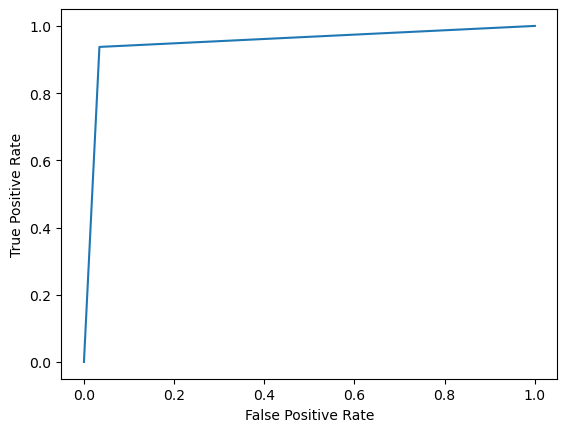

In [271]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The plot above is the AUC-ROC plot for predicting the test data

上图为随机森林模型在预测测试集的样本时产出的概率曲线

# Remark

# 总结

Using the random forest model, the model's performance on testing data is surprisingly good:

Among all patients not contracting diabetes, 98% of those are correctly identifited by our model

Among all patients contracting diabetes, 91% of those are correctly idenfitied by our model

97% of those who did not contract diabetes were correctly identified (Among all those who are identified as not contracing diabetes)

94% of those who did contract diabetes were correctly identified (Among all those who are identified as contracing diabetes)

The corresponding AUC-ROC area reached 0.951593137254902, exceeding 0.9, also this value is the peak value of AUC-ROC area among all models!

A possible reason that the random forest model stands out to have the best performance is that, for the dataset provided, almost all predictors are categorical, which fits the nature of decision tree model as "making choices between yes and no".

Therefore, this model is qualified to be dumped with pickle, and deployed on the Heroku Platform as an online web application.

随机森林模型针对测试集的预测表现无可挑剔

98%的非糖尿病患者被正确地分类为非糖尿病患者

91%的糖尿病患者被成功识别

所有被模型分类为非糖尿病患者的病人中，997确实为非糖尿病患者

所有被模型分类为糖尿病患者的病人中，94实为糖尿病患者

同时，模型的概率曲线数值突破了0.95，达到了0.9516.

# The Web Application: Diabetes contracting risk predictor

# Web应用程序 糖尿病确诊推断系统

Here is the link for the web application deployed on Heroku platform, all right reserved by Guangyan(Edward) Huang.

该机器学习模型已经成功在Heroku平台上部署为开源web应用程序，以下为应用程序链接。

https://diabetes-predictor.herokuapp.com/

# Thank you for finishing up this report!

# 感谢观看！